<a href="https://colab.research.google.com/github/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_002_Modern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Taste of Deep Learning through Python 
## Session 2: The Modern

### 2.0 The story of ABC

A modern approach to perform supervised learning with massive data is to employ some Deep Learning Package to perform stochastic gradient descent. A turning point in the history is 2012's [ImageNet ILSVRC](https://image-net.org/challenges/LSVRC/2012/) when deep neural network come to the spotlight of nowadays AI. In the competition, one is given numerous training **images as input** and corresponding **labels as output**, and the task is to build a model that could map testing images input to the desired label output. That is a classification task with input of high dimension!

![picture](https://drive.google.com/uc?id=1VEekyMKNvjnijMcycEzR_ypdyCcNKKWp)

(combined figure thanks to [Andrej Karpathy](https://cs.stanford.edu/people/karpathy/cnnembed/) from Standford)

With two [GTX 580 3GB GPUs](https://www.techpowerup.com/gpu-specs/geforce-gtx-580.c270), a team from University of Toronto won the competition with a deep convolutional neural network [AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf). It was GPU provide sufficient **Computing Power** to digest the **Big Data** of images to build an **AI** based on deep neural networks (a.k.a. [deep learning](https://www.deeplearningbook.org/)) to outperform other teams. The field had been dominanted by deep neural network since then. Later in 2015, the winner of the same competition outperform human and the winner model [ResNet](https://arxiv.org/abs/1512.03385?context=cs) had found applications in many other domains. 

![picture](https://drive.google.com/uc?id=1f9pD8LmPkQXWvNYfq_TZcZjzPonN1Ug_)

Performing deep learning is essentially performing **optimization** to minimize the **loss function** of a **composition of linear and non-linear functions** that attempt to approximate the required input-output mapping. To get a taste, we will only need to have to pick up one more concept to deal with non-linearity; because in [the last notebook](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_001_Classics.ipynb), we've seen techniques to deal with massive data with different dimensionalities.

### 2.1 Derviatives: Handling Non-linearity with Linear Approximation

Many common functions are non-linear. [Linear approximation](https://en.wikipedia.org/wiki/Linear_approximation), when that exists, provide a handy way to deal with non-linearity. At a suitable point of a function, the gradient of the linear approximation corresponds to the [derivative](https://en.wikipedia.org/wiki/Derivative) of the function at that point. For single-valued function is concerned, the gradient is also called a slope; whereas for multivariate function, at each point of evaluation, information about its gradient are stored in the [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant).

For example, to make a dense layer in a neural laywork, one simply composite a non-linear function $f$ whose linear approximation exist almost everywhere (such as ReLu, tanh, etc.) with a linear transform $\textbf{Wx}$ added to a bias $\textbf{b}$. 

![picture](https://drive.google.com/uc?id=16QViOhwXeuFm7ohHL2j9tbog6A92aB9J)

Information about its gradient with respect to $\textbf{x}$ can be found by compositing the derivative of $f$ and the matrix $W$ with technique in calculus known as the [chain rule](https://machinelearningmastery.com/the-chain-rule-of-calculus-for-univariate-and-multivariate-functions/). Interested audience should take the subject M1/M2 to build a solid foundation. (Notably, the use of dense layer in a neural network had been theoretically backed by the [universal approximation theorem](https://cognitivemedium.com/magic_paper/assets/Hornik.pdf).)

There are other examples that may involve other compositions of linear and non-linear functions. Very common, a convolution layer reduced the number of parameters by assuming some geometric priors of the underlying space. Once again, when one is concerned with the gradient of these layers composited of various function, one often employ *chain rule* to do the job.

### 2.2 Gradient Descent and Stochastic Gradient Descent

What's so great about the gradient? Well, we could perform optimization with gradient descent; or in practice, perform *stochastic gradient descent (SGD)* to process massive data with randomly selected mini-batch.
![picture](https://drive.google.com/uc?id=1VtHtXXjYMKUu-2lk6ch_wS0n_gZxnekG)

(Thanks to Harold Chao for 3D animation)

The mini-batch strategy is like what we went through in the last notebook. The major difference is that, this time we are minimizing a loss function that measure how large an error is in the input-output mapping; whereas last time we are maximizing the likelihood of how well a model is correct. We would invite audience to find if there is any duality between the two approaches.

In practice, SGD are done by the so-called backpropagation commonly found in deep learning packahes such as TensorFlow and PyTorch. The optimization process are called training of deep neural network and the computation graph are often studied.

![picture](https://drive.google.com/uc?id=1Wbxic-P6JryC2soC--tAvGZQXusFF7dK)

(From TensorFlow)

### 2.3 Classification of Images

Enough talk? Let's get our hands dirty!

### 2.3.1 Classical Example: Classifying Digits

First of all, let's import the required packages and the dataset MNIST.

*Setup Runtime*

In [3]:
!pip install tensorflow
from numpy import random
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
11501568/11490434 [==============================] - 0s 0us/step


Each datum from MNIST has 28x28 pixels:

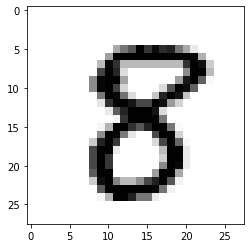

In [6]:
datum = np.reshape(x_train[333], (28,28))
plt.imshow(datum,cmap='Greys')
plt.show()

Continue to run the next code cell to see more training data

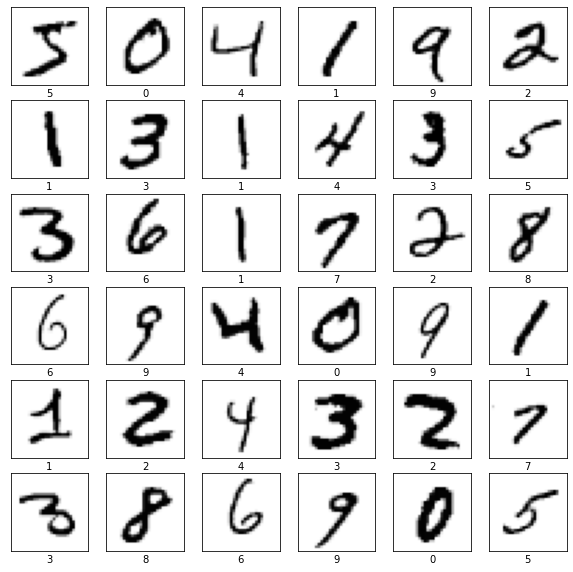

In [7]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[i][:,:], cmap='Greys')
    class_name = y_train[i]
    plt.xlabel(class_name)

Here we build our model:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8,5, activation='relu', input_shape=(28, 28, 1),use_bias = True, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1,1), padding='same'))
model.add(layers.Conv2D(16,3, activation='relu',use_bias = True, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(layers.Conv2D(32,2, activation='relu',use_bias = True, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

Note that the model composed of many layers. The parameters to be trained provide the learning capability for the model to fit to training data by minimizing the loss. Convolution layers assumed some geometric priors and are able to extract features with much less parameters; whereas denses layers are like the regression see in [the previous notebook](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/ST5-001-Classics.ipynb).  

Here we train our model:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 10s 5ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0621 - val_accuracy: 0.9818
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0561 - val_accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0634 - val_accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.0605 - val_accuracy: 0.9848


Test the model:

In [ ]:
predict_dataset = tf.convert_to_tensor(x_train[0:3])
# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)
for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  name = class_idx
  print("Example {} : prediction: {} , Actual: {}".format(i, name,y_train[i]))
  if name == y_train[i]:
    print("Correct!")
  else:
    print("Incorrect")

Example 0 : prediction: 5 , Actual: 5
Correct!
Example 1 : prediction: 0 , Actual: 0
Correct!
Example 2 : prediction: 4 , Actual: 4
Correct!


##2.3.2 Visualizing the classification

To get a better picture of what a classification task has done, one may find a low-dimensional visulization of the high dimensional data. Thanks to prior works of Laurens van der Maaten, Sam Roweis and Geoffrey Hinton, we have a convenient tool called [t-SNE](https://lvdmaaten.github.io/tsne/) for this purpose. Note that this is a stochastic embedding and so you may try running again (or look at the result of your neighbors) for another visualization :)

In [4]:
inspect_points = 10000
x_t = np.reshape(x_train, (60000, 28*28))
y_t = np.reshape(y_train, (60000, 1))
idx = np.random.randint(60000,size = inspect_points)
train = np.concatenate((y_t[idx,:], x_t[idx,:]),axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


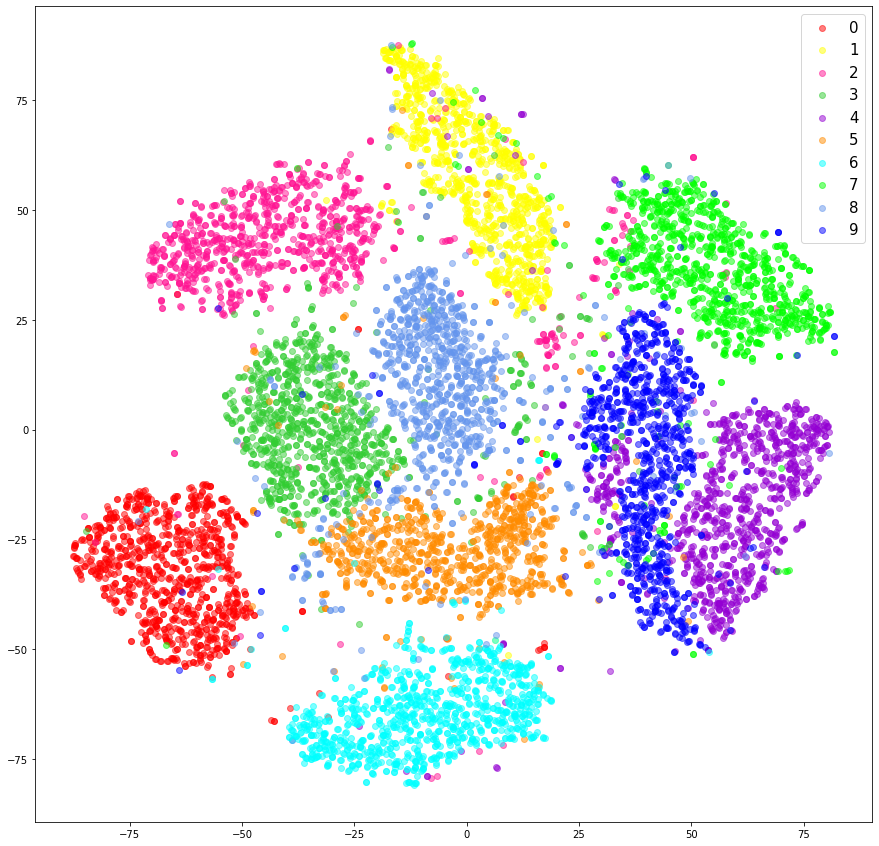

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_res = tsne.fit_transform(train)
#choices of cmap: 'dimgray', 'silver', 'rosybrown', 'brown', 'salmon', 'orangered', 'darkorange', 'peachpuff', 'tan', 'gold', 'khaki', 'olivedrab', 'yellowgreen', 'lawngreen', 'palegreen', 'limegreen', 'mediumseagreen', 'springgreen', 'aqua', 'powderblue', 'steelblue', 'slategray', 'cornflowerblue', 'blue', 'slateblue', 'blueviolet', 'thistle', 'deeppink', 'lightpink'
#more choices from here https://matplotlib.org/stable/gallery/color/named_colors.html

plt.subplots(figsize=(15,15)) 
X = tsne_res[:,0] 
Y = tsne_res[:,1] 
colors = ['red', 'yellow', 'deeppink','limegreen',  'darkviolet','darkorange', 'aqua',  'lime', 'cornflowerblue','blue']
for i in range(10):
  plt.scatter(X[train[:,0]==i], Y[train[:,0]==i], color=colors[i], alpha = 0.5)
plt.legend(('0','1','2','3','4','5','6','7','8','9'), prop={'size': 15} )
plt.show()

## 2.3.3 Let's Have Some Fun: Sudoku!

**2.3.3.1 It's time for a Game**

Recall that valuable perception tasks are often the last miles of automation pipelines, and at the same time, the extra miles of previous systems. 

What's so good about teaching a computer to recognitize digits? Well, it completed the pipeline to solve Sudoku! 

Now you may take out our phone and ask for a puzzle from us to [try this out](https://hanlunai.github.io/wasm-sudoku-solver/)! You may also use your phone the scan this QR code:

![picture](https://drive.google.com/uc?id=1f0M8Hrfrv5ZC5EL5HblY5MrHhMFUUAU2)

Or you may just watch this demostration video:

In [1]:
from IPython.display import HTML
HTML('<iframe width="960" height="540" src="https://www.youtube.com/embed/3icb6AdGC4o" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

**2.3.3.2 The pipeline, what we have done and conditions of use**


The web application is largely based on [Colin Eberhardt's work](https://blog.scottlogic.com/2020/01/03/webassembly-sudoku-solver.html) involving a simplified pipeline of:
1.   Preprocessing and perspective transfrom
2.   Recognising digits
3.   Solving a puzzle with constraint satisfaction
4.   Overlay of result with specific perspective transform


The seemingly difficult steps 1, 2, and 4, could be tackled easily computers in early days, leaving step 3 the last piece of the puzzle for an automatic soltion to the task. Ironically, step 3 was just a trival task if one had the perception of vision. Here is where deep learning come to the rescue!

To recognize a sudoku puzzle, there are a total of 81 boxes need to be recognize, each correspond to one of the 10 classes out of (1,2,3,4,5,6,7,8,9 and blank); these information are designed not to contain redundancy so fail of recognization in one box lead to complete failure. Hence our work is to boost the accuracy of the performance as much as possible.

Like other applications of deep learning (a.k.a. deep neural network), the model depends much on the input training data. To boost overall performance of Colin's codes in [TensorFlow.js](https://github.com/tensorflow/tfjs), we simply increase variety of input data by more fonts, and adding noise in training data to enhance model robustness.

![picture](https://drive.google.com/uc?id=1vZIn99jdJNwbedLEXk7FJvJ00IUZcjmd)

Note that training data here are based on computer genearted fonts, so the application won't work on handwritten puzzle, nor fonts that it hasn't seen. Well, unless you train your version with these as training data ;)

## 2.3.4 More Practical Use Cases: OCR, other tasks in CV...

It's now your turn to tell us your understanding of what Optical Character Recognition/ Computer Vision/ other perception task can do. Does it complete the last mile of a automation pipeline? Please response with this [Google Form](https://forms.gle/5s3UfK4yjLLfvxMT9).

© Hanlun Artificial Intelligence Limited